In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer, Dense, Dropout

In [ ]:
data = pd.read_csv("/content/thyroidDF.csv")

In [ ]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027


In [ ]:
data.shape

(9172, 31)

In [ ]:
data.isnull().sum()

In [ ]:
diagnoses={'A':'hyperthroid conditions',
           'B':'hyperthyroid conditions',
           'C':'hyperthyroid conditions',
           'D':'hyperthyroid conditions',
           'E':'hyperthyroid conditions',
           'F':'hyperthyroid conditions',
           'G':'hyperthyroid conditions',
           'H':'hyperthyroid conditions',
           'I':'binding protein',
           'j':'binding protien',
           'k':'general health',
           'L':'replacement therapy',
           'M':'replacement therapy',
           'N':'replacement therapy',
           'O':'antithyroid treatment',
           'P':'antithyroid treatment',
           'Q':'antithyroid treatment',
           'R':'miscellaneous',
           'S':'miscellaneous',
           'T':'miscellaneous'}
data['target']= data['target'].map(diagnoses)


In [ ]:
data.dropna(subset=['target'],inplace=True)

In [ ]:
data['target'].value_counts()

hyperthyroid conditions    628
binding protein            346
replacement therapy        336
miscellaneous              281
hyperthroid conditions     147
antithyroid treatment       33
Name: target, dtype: int64

In [ ]:
data['target'].isnull().sum()

0

In [ ]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,miscellaneous,840803047
18,63,F,t,f,f,t,f,f,f,f,...,48.0,t,1.02,t,47.0,f,NaN,other,hyperthyroid conditions,840815067
32,41,M,f,f,f,f,f,f,f,f,...,39.0,t,1.00,t,39.0,f,NaN,other,miscellaneous,840816013
33,71,F,t,f,f,f,f,f,f,f,...,126.0,t,1.38,t,91.0,f,NaN,other,binding protein,840816014
39,55,F,t,f,f,f,f,f,f,t,...,136.0,t,1.48,t,92.0,f,NaN,other,replacement therapy,840816047


In [ ]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG,patient_id
count,1771.000000,1625.000000,1198.000000,1676.000000,1607.000000,1608.000000,97.000000,1.771000e+03
mean,49.811406,18.704117,2.379299,125.128079,1.069266,124.768371,47.951546,8.531494e+08
std,19.190467,51.741560,1.487835,64.204156,0.281821,78.538793,32.483564,7.531264e+06
min,1.000000,0.005000,0.050000,2.000000,0.280000,1.400000,9.299999,8.408030e+08
25%,34.000000,0.210000,1.500000,82.000000,0.900000,80.000000,32.000000,8.504165e+08
50%,52.000000,3.200000,2.100000,125.000000,1.000000,110.000000,36.000000,8.510240e+08
75%,65.000000,12.000000,3.000000,165.000000,1.190000,165.000000,47.000000,8.607180e+08
max,91.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000,8.701190e+08


In [ ]:
data[data.age>100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id


In [ ]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,miscellaneous,840803047
18,63,F,t,f,f,t,f,f,f,f,...,48.0,t,1.02,t,47.0,f,NaN,other,hyperthyroid conditions,840815067
32,41,M,f,f,f,f,f,f,f,f,...,39.0,t,1.00,t,39.0,f,NaN,other,miscellaneous,840816013
33,71,F,t,f,f,f,f,f,f,f,...,126.0,t,1.38,t,91.0,f,NaN,other,binding protein,840816014
39,55,F,t,f,f,f,f,f,f,t,...,136.0,t,1.48,t,92.0,f,NaN,other,replacement therapy,840816047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9138,76,M,f,f,f,f,f,f,f,f,...,122.0,t,0.94,t,130.0,f,NaN,SVI,hyperthyroid conditions,870115042
9142,15,F,f,f,f,f,f,f,f,f,...,92.0,t,0.96,t,96.0,f,NaN,other,hyperthyroid conditions,870116005
9149,75,F,t,f,f,f,f,f,f,t,...,54.0,t,1.03,t,53.0,f,NaN,SVI,hyperthyroid conditions,870116038
9162,36,F,f,f,f,f,f,f,f,f,...,84.0,t,1.26,t,67.0,f,NaN,other,binding protein,870119008


In [ ]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [ ]:
data.isnull().sum()

age                       0
sex                      76
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     146
T3_measured               0
T3                      573
TT4_measured              0
TT4                      95
T4U_measured              0
T4U                     164
FTI_measured              0
FTI                     163
TBG_measured              0
TBG                    1674
referral_source           0
target                    0
patient_id                0
dtype: int64

In [ ]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
4,32,F,f,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,36.0,other,miscellaneous
18,63,F,t,f,f,t,f,f,f,f,...,t,48.0,t,1.02,t,47.0,f,NaN,other,hyperthyroid conditions
32,41,M,f,f,f,f,f,f,f,f,...,t,39.0,t,1.00,t,39.0,f,NaN,other,miscellaneous
33,71,F,t,f,f,f,f,f,f,f,...,t,126.0,t,1.38,t,91.0,f,NaN,other,binding protein
39,55,F,t,f,f,f,f,f,f,t,...,t,136.0,t,1.48,t,92.0,f,NaN,other,replacement therapy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9138,76,M,f,f,f,f,f,f,f,f,...,t,122.0,t,0.94,t,130.0,f,NaN,SVI,hyperthyroid conditions
9142,15,F,f,f,f,f,f,f,f,f,...,t,92.0,t,0.96,t,96.0,f,NaN,other,hyperthyroid conditions
9149,75,F,t,f,f,f,f,f,f,t,...,t,54.0,t,1.03,t,53.0,f,NaN,SVI,hyperthyroid conditions
9162,36,F,f,f,f,f,f,f,f,f,...,t,84.0,t,1.26,t,67.0,f,NaN,other,binding protein


In [ ]:
x['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [ ]:
x['sex'].replace(np.nan,'F',inplace=True)

In [ ]:
x['sex'].value_counts()

F    1428
M     343
Name: sex, dtype: int64

In [ ]:
x.isnull().sum()

age                       0
sex                       0
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     146
T3_measured               0
T3                      573
TT4_measured              0
TT4                      95
T4U_measured              0
T4U                     164
FTI_measured              0
FTI                     163
TBG_measured              0
TBG                    1674
referral_source           0
target                    0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1771 entries, 4 to 9169
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1771 non-null   int64  
 1   sex                  1695 non-null   object 
 2   on_thyroxine         1771 non-null   object 
 3   query_on_thyroxine   1771 non-null   object 
 4   on_antithyroid_meds  1771 non-null   object 
 5   sick                 1771 non-null   object 
 6   pregnant             1771 non-null   object 
 7   thyroid_surgery      1771 non-null   object 
 8   I131_treatment       1771 non-null   object 
 9   query_hypothyroid    1771 non-null   object 
 10  query_hyperthyroid   1771 non-null   object 
 11  lithium              1771 non-null   object 
 12  goitre               1771 non-null   object 
 13  tumor                1771 non-null   object 
 14  hypopituitary        1771 non-null   object 
 15  psych                1771 non-null   o

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1771 entries, 4 to 9169
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1771 non-null   int64  
 1   sex                  1771 non-null   object 
 2   on_thyroxine         1771 non-null   object 
 3   query_on_thyroxine   1771 non-null   object 
 4   on_antithyroid_meds  1771 non-null   object 
 5   sick                 1771 non-null   object 
 6   pregnant             1771 non-null   object 
 7   thyroid_surgery      1771 non-null   object 
 8   I131_treatment       1771 non-null   object 
 9   query_hypothyroid    1771 non-null   object 
 10  query_hyperthyroid   1771 non-null   object 
 11  lithium              1771 non-null   object 
 12  goitre               1771 non-null   object 
 13  tumor                1771 non-null   object 
 14  hypopituitary        1771 non-null   object 
 15  psych                1771 non-null   o

In [ ]:
x['age']=x['age'].astype('float')
x['TSH']=x['TSH'].astype('float')
x['T3']=x['T3'].astype('float')
x['TT4']=x['TT4'].astype('float')
x['T4U']=x['T4U'].astype('float')
x['FTI']=x['FTI'].astype('float')
x['TBG']=x['TBG'].astype('float')


In [ ]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
ordinal_encoder = OrdinalEncoder(dtype='int64')
x.iloc[:, 1:16] = ordinal_encoder.fit_transform(x.iloc[:, 1:16])













<ipython-input-23-c93efbd70f82>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:, 1:16] = ordinal_encoder.fit_transform(x.iloc[:, 1:16])


In [ ]:
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
4,32.0,0,0,0,0,0,0,0,0,0,...,f,NaN,f,NaN,f,NaN,t,36.0,other,miscellaneous
18,63.0,0,1,0,0,1,0,0,0,0,...,t,48.0,t,1.02,t,47.0,f,NaN,other,hyperthyroid conditions
32,41.0,1,0,0,0,0,0,0,0,0,...,t,39.0,t,1.00,t,39.0,f,NaN,other,miscellaneous
33,71.0,0,1,0,0,0,0,0,0,0,...,t,126.0,t,1.38,t,91.0,f,NaN,other,binding protein
39,55.0,0,1,0,0,0,0,0,0,1,...,t,136.0,t,1.48,t,92.0,f,NaN,other,replacement therapy


In [ ]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
4,32.0,0,0,0,0,0,0,0,0,0,...,f,NaN,f,NaN,f,NaN,t,36.0,other,miscellaneous
18,63.0,0,1,0,0,1,0,0,0,0,...,t,48.0,t,1.02,t,47.0,f,NaN,other,hyperthyroid conditions
32,41.0,1,0,0,0,0,0,0,0,0,...,t,39.0,t,1.00,t,39.0,f,NaN,other,miscellaneous
33,71.0,0,1,0,0,0,0,0,0,0,...,t,126.0,t,1.38,t,91.0,f,NaN,other,binding protein
39,55.0,0,1,0,0,0,0,0,0,1,...,t,136.0,t,1.48,t,92.0,f,NaN,other,replacement therapy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9138,76.0,1,0,0,0,0,0,0,0,0,...,t,122.0,t,0.94,t,130.0,f,NaN,SVI,hyperthyroid conditions
9142,15.0,0,0,0,0,0,0,0,0,0,...,t,92.0,t,0.96,t,96.0,f,NaN,other,hyperthyroid conditions
9149,75.0,0,1,0,0,0,0,0,0,1,...,t,54.0,t,1.03,t,53.0,f,NaN,SVI,hyperthyroid conditions
9162,36.0,0,0,0,0,0,0,0,0,0,...,t,84.0,t,1.26,t,67.0,f,NaN,other,binding protein


In [ ]:
x.replace(np.nan,'0',inplace=True)

In [ ]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
4,32.0,0,0,0,0,0,0,0,0,0,...,f,0,f,0,f,0,t,36.0,other,miscellaneous
18,63.0,0,1,0,0,1,0,0,0,0,...,t,48.0,t,1.02,t,47.0,f,0,other,hyperthyroid conditions
32,41.0,1,0,0,0,0,0,0,0,0,...,t,39.0,t,1.0,t,39.0,f,0,other,miscellaneous
33,71.0,0,1,0,0,0,0,0,0,0,...,t,126.0,t,1.38,t,91.0,f,0,other,binding protein
39,55.0,0,1,0,0,0,0,0,0,1,...,t,136.0,t,1.48,t,92.0,f,0,other,replacement therapy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9138,76.0,1,0,0,0,0,0,0,0,0,...,t,122.0,t,0.94,t,130.0,f,0,SVI,hyperthyroid conditions
9142,15.0,0,0,0,0,0,0,0,0,0,...,t,92.0,t,0.96,t,96.0,f,0,other,hyperthyroid conditions
9149,75.0,0,1,0,0,0,0,0,0,1,...,t,54.0,t,1.03,t,53.0,f,0,SVI,hyperthyroid conditions
9162,36.0,0,0,0,0,0,0,0,0,0,...,t,84.0,t,1.26,t,67.0,f,0,other,binding protein


In [ ]:
label_encoder = LabelEncoder()
y_dt=label_encoder.fit_transform(y)

In [ ]:
y=pd.DataFrame(y_dt,columns=['target'])

In [ ]:
y

,target
0,0
1,1
2,2
3,3
4,4
...,...
1766,1766
1767,1767
1768,1768
1769,1769


<ipython-input-31-57794a65ab12>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = x.corr()


<Axes: >

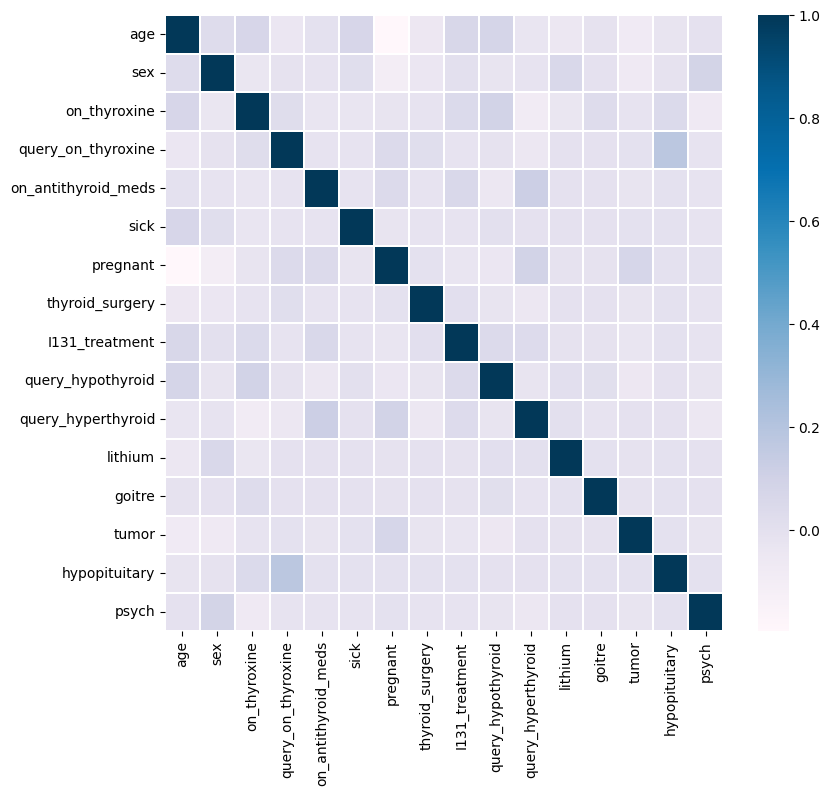

In [ ]:
  import seaborn as sns
  cormat = x.corr()
  f,ax = plt.subplots(figsize=(9,8))
  sns.heatmap(cormat,ax = ax,cmap ="PuBu",linewidths = 0.1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [ ]:
y_train.value_counts()

target
0         1
1224      1
1191      1
1190      1
1189      1
         ..
603       1
602       1
601       1
600       1
1769      1
Length: 1416, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0,k_neighbors=1)
x_bal,y_bal=os.fit_resample(x_train,y_train)
x_test_bal,y_test_bal=os.fit_resample(x_test,y_test)

In [ ]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_bal = sc.fit_transform(x_bal)
x_test_bal= sc.transform(x_test_bal)


In [ ]:
x_bal

In [ ]:
columns=['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treatment']

In [ ]:
x_test_bal

In [ ]:
x_bal= pd.DataFrame(x_bal,columns=columns)

In [ ]:
x_bal

In [ ]:
from sklearn.inspection import permutation_importance
results = permutation_importance(rfr,x_bal,y_bal,scoring='accuracy')

In [ ]:
feature_importance=['age','sex','on_thyroxine','query_on_thyroid_meds','sick','pregnant','thyroid_surgery','I131_treament']


In [ ]:

importance = results.importances_mean
importance = np.sort(importance)
for i,v in enumerate(importance)
  i=feature_importance[i]
  print('feature:{:<20}Score:{}'.format(i,v))
  plt.figure(figsize(10,10))
  plt.bar(x=feature_importance,height=importance)
  plt.xticks(rotation=30,ha='right')
  plt.show()


In [ ]:
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
4,32.0,0,0,0,0,0,0,0,0,0,...,f,0,f,0,f,0,t,36.0,other,miscellaneous
18,63.0,0,1,0,0,1,0,0,0,0,...,t,48.0,t,1.02,t,47.0,f,0,other,hyperthyroid conditions
32,41.0,1,0,0,0,0,0,0,0,0,...,t,39.0,t,1.0,t,39.0,f,0,other,miscellaneous
33,71.0,0,1,0,0,0,0,0,0,0,...,t,126.0,t,1.38,t,91.0,f,0,other,binding protein
39,55.0,0,1,0,0,0,0,0,0,1,...,t,136.0,t,1.48,t,92.0,f,0,other,replacement therapy


In [ ]:
x_bal.drop(['age','sex','on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treament'])

In [ ]:
x_test_bal.drop(['age','sex','on_thyroxine','on_antithyroid_meds','sick','pregnant','thyroid_surgery','I131_treament'])

In [ ]:
x_bal.head()

 Milestone3

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1771 entries, 4 to 9169
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1771 non-null   int64  
 1   sex                  1695 non-null   object 
 2   on_thyroxine         1771 non-null   object 
 3   query_on_thyroxine   1771 non-null   object 
 4   on_antithyroid_meds  1771 non-null   object 
 5   sick                 1771 non-null   object 
 6   pregnant             1771 non-null   object 
 7   thyroid_surgery      1771 non-null   object 
 8   I131_treatment       1771 non-null   object 
 9   query_hypothyroid    1771 non-null   object 
 10  query_hyperthyroid   1771 non-null   object 
 11  lithium              1771 non-null   object 
 12  goitre               1771 non-null   object 
 13  tumor                1771 non-null   object 
 14  hypopituitary        1771 non-null   object 
 15  psych                1771 non-null   o

In [ ]:
#milestone 4

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfr1 = RandomForestClassifier().fit(x_os,y_os.values.ravel())
y_pred = rfr1.predict(x_test_os)
rfr1 = RandomForestClassifier()

In [ ]:
rfr1.fit(x_os,y_os.values.ravel())

In [ ]:
y_pred = rfr1.predict(x_test_os)

In [ ]:
y_pred = rfr1.predict(x_test_os)

In [ ]:
train_score = accuracy_score(y_os,rfr1.predict(x_0s))
train_score

In [ ]:
print(classification_report(y_test_os,y_pred))

In [ ]:
from xghoost import XBGclassifier
xgb1 = XGBClassifier()
xgb1.fit(x_os,y_os)

In [ ]:
y_pred = xgb1.predict(x_test_os)

In [ ]:
print(classification_report(y_test_os,y_pred))

In [ ]:
accuracy_score(y_test_os,y_pred)

In [ ]:
accuracy_score(y_test_os,y_pred)

In [ ]:
sv.fit(x_bal,y_bal)

In [ ]:
y_pred = sv.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

In [ ]:
train_score=accuracy_score(y_bal,sv.predict(x_bal))
train_score

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(units = 128,activation='relu',input_shape=(10,)))

In [ ]:
model.add(Dense(units = 128,activation='relu',kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units=256,activation='relu',kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units=128,activation='relu',kernel_initializer='random_uniform'))

In [ ]:
model.add(Dense(units = 128,activation='relu',kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units=256,activation='relu',kernel_initializer='random_uniform'))
model.add(Dropout(0.2))
model.add(Dense(units=128,activation='relu',kernel_initializer='random_uniform'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dense_4 (Dense)             (None, 1)                 1

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_bal,y_bal,validation_data=[x_test_bal,y_test_bal]),epochs=15)

In [ ]:
rfr1.predict([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]])

In [ ]:
sv.predict([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]])

In [ ]:
col = ['goitre','tumor','hypopiturary','psych','TSH','T3','TT4','T4U','FTI','TBG']
da = [[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]]
da1 = pd.DataFrame(data = da,columns=col)
xgb1.predict(dal)

In [ ]:
model.predict([[0,0,0,0,0.000000,0.0,0.0,1.00,0.0,40.0]])

milestone 5

In [ ]:
print(classification_report(y_test_bal,y_pred))

In [ ]:
train_score = accuracy_score(y_bal,rfr1.predict(x_bal))

In [ ]:
train_score

In [ ]:
y_pred=xgb.predict(x_test_bal)

In [ ]:
train_score = accuracy_score(y_bal,xgb.predict(x_bal))
train_score

In [ ]:
y_pred = sv.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

In [ ]:
train_score=accuracy_score(y_bal,sv.predict(x_bal))

In [ ]:
y_pred = model.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

In [ ]:
accuracy_score(y_test_bal,y_pred)

In [ ]:
params ={
    'c':[0.1,1,10,100,1000],
     'gamma':[1,0.1,0.01,0.001,0.0001],
     'kernal':['rbf','sqrt']
}

In [ ]:
random_svc = RandomizedSearchCV(sv,params,scoring='accuracy',cv=5,n_jobs=1)

In [ ]:
random_svc.fit(x_bal,y_bal)

In [ ]:
random_svc.best_params_

In [ ]:
sv1=SVC(kernel= 'rbf',gamma=0.1,c=100)

In [ ]:
sv1.fit(x_bal,y_bal)

In [ ]:
y_pred= sv1.predict(x_test_bal)

In [ ]:
print(classification_report(y_test_bal,y_pred))

In [ ]:
train_score=accuracy_score(y_bal,sv1.predict(x_bal))
train_score

In [ ]:
import pickle
pickle.dump(sv1,open('thyroid_1_model.pkl','wb'))

In [ ]:
features=np.array([[0,0,0,0,0,000000,0.0,0.0,1.00,0.0,40.0]])
print(label_encoder.inverse_transform(xgb1.predict(features)))

In [ ]:
pickle.dump(label_encoder,open('label_encoder.pkl','wb'))

In [ ]:
data['target'].unique()

array(['miscellaneous', 'hyperthyroid conditions', 'binding protein',
       'replacement therapy', 'hyperthroid conditions',
       'antithyroid treatment'], dtype=object)

In [ ]:
y['target'].unique()

array([   0,    1,    2, ..., 1768, 1769, 1770])

milestone 6

In [ ]:
import pickle
pickle.dump(sv1,open('thyroid_1_model.pkl','wb'))

In [ ]:
from flask import Flask,render_template,request
import numpy as np
import pickle
import pandas as pd

In [ ]:
model=pickle.load
le=pickle.load
app=Flask(_name)

In [ ]:
def about():
  return render_template('home.html')

In [ ]:
def predict():
  x=[[float(x)for x in request.form.values()]]
  print(x)
  col=['goitre','tumor','hypopitutiary','psych','TSH','T3','TT4','T4U','FTI','TGB']
  x=pd.DataFrame(x,columns=col)
  print(x)
  pred=model.predict(X)
  pred=le.inverse_transform(pred)
  print(pred[0])
  return render_template('sumbit.html',prediction_text=str(pred))

In [ ]:
if__name__=="__main__":
  app.run(debug=False)